In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [9]:
df['score'].mean()

7.027161060142644

## Load the dataframe in via CSV:

In [4]:
df = pd.read_csv('../pitchfork3.csv')

df['word_count'] = df['content'].str.count('\w+')
df['adj_count'] = df['content_adj'].str.count('\w+')

df['avg_word_length'] = df['content'].str.count('[^ ]') / df['word_count']
df['adj_word_length'] = df['content_adj'].str.count('[^ ]') / df['content_adj'].str.count('\w+')
df['adj_freq'] = df['adj_count'] / df['word_count']

In [11]:
df['best_new_reissue'].sum()

367L

In [28]:
# This loop adds data for an artist's previous reviews on Pitchfork

prev_data = []
for i in range(len(df['score'])):
    reviewid = df['reviewid'][i]
    artist = df['artist'][i]
    sub_df = df[(df['pub_date'] < df['pub_date'][i]) & (df['artist'] == df['artist'][i])]
    if df['artist'][i] == 'various artists':
        num_reviews = 1
        num_bnm = 0
    else:
        num_reviews = sub_df['score'].count() + 1
        num_bnm = sub_df['best_new_music'].sum()
    if num_reviews == 1:
        avg_scores = df['score'][i]
    else:
        avg_scores = sub_df['score'].mean()
    
    prev_data.append((reviewid, artist, num_reviews, avg_scores, num_bnm))

df_prev = pd.DataFrame(prev_data, columns =['reviewid', 'artist', 'num_prev_reviews', 'avg_score_of_prev_reviews', 'number_prev_bnm'])

df = df.merge(df_prev)

In [91]:
values_dict = {1999: '1: Pre BNM', 
               2000: '1: Pre BNM', 
               2001: '1: Pre BNM', 
               2002: '1: Pre BNM', 
               2003: '2: Pre PMF',
               2004: '2: Pre PMF', 
              2005:  '2: Pre PMF', 
              2006:  '3: Pre Redesign', 
              2007:  '3: Pre Redesign', 
              2008:  '3: Pre Redesign', 
              2009:  '3: Pre Redesign', 
              2010:  '3: Pre Redesign', 
              2011:  '4: Pre CD', 
              2012:  '4: Pre CD', 
              2013:  '4: Pre CD', 
               2014:  '4: Pre CD', 
               2015:  '4: Pre CD', 
               2016:  '5: Current Era', 
               2017:  '5: Current Era', 
              }

df['era'] = df['pub_year'].map(values_dict)

In [29]:
df.describe()

,Unnamed: 0,index,score,best_new_music,best_new_reissue,pub_weekday,pub_day,pub_month,pub_year,year,...,abs_subjectivity,word_count,adj_count,adj_freq,score_bin,avg_word_length,adj_word_length,num_prev_reviews,avg_score_of_prev_reviews,number_prev_bnm
count,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,19620.000000,...,19620.000000,19619.000000,19618.000000,19618.000000,19620.000000,19618.000000,19618.000000,19620.000000,19620.000000,19620.000000
mean,9809.500000,10214.900000,7.027161,0.053109,0.018705,2.136799,15.539704,6.288685,2009.201019,2008.051274,...,0.489786,729.636985,63.259252,0.087775,6.589042,4.640417,6.547198,2.411570,7.121023,0.114118
std,5663.950476,5876.810528,1.276604,0.224257,0.135486,1.651299,8.750688,3.314502,4.911071,7.132663,...,0.062717,261.649407,22.217485,0.015187,1.312823,0.199528,0.445006,2.341674,1.196409,0.440535
min,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1999.000000,1957.000000,...,0.000000,0.000000,1.000000,0.021108,0.000000,3.621245,3.000000,1.000000,0.000000,0.000000
25%,4904.750000,5164.750000,6.500000,0.000000,0.000000,1.000000,8.000000,3.000000,2005.000000,2005.000000,...,0.449127,562.000000,48.000000,0.077348,6.000000,4.504036,6.250463,1.000000,6.680000,0.000000
50%,9809.500000,10172.500000,7.300000,0.000000,0.000000,2.000000,15.000000,6.000000,2009.000000,2009.000000,...,0.489810,678.000000,60.000000,0.086732,7.000000,4.633208,6.539474,1.000000,7.366667,0.000000
75%,14714.250000,15295.250000,7.800000,0.000000,0.000000,3.000000,23.000000,9.000000,2013.000000,2013.000000,...,0.530623,830.000000,73.000000,0.097315,7.000000,4.769629,6.842105,3.000000,7.880833,0.000000
max,19619.000000,20390.000000,10.000000,1.000000,1.000000,6.000000,31.000000,12.000000,2017.000000,2017.000000,...,0.735714,3924.000000,336.000000,0.161058,10.000000,5.537344,8.306122,25.000000,10.000000,6.000000


In [30]:
df.to_csv('../pitchfork2.csv')


In [ ]:
df = pd.read_csv('../pitchfork2.csv')

In [92]:
years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

In [49]:
df_spotify = pd.read_csv('spotify_with_rank.csv')

In [50]:
df_merged = df.merge(df_spotify, how='left', on=['artist', 'title'])

In [ ]:
#df.drop('abstract_adj', axis=1, inplace=True)

In [ ]:
df['abstract'].fillna(' ', inplace=True)

# What Are We Dealing With Here?

I ran a scraper on Jan 6, 2017 (credit to Nolan Conaway for creating the scraper -- I updated the scraper to accomodate changes to Pitchfork's html, and add columns for Best New Reissue and the Abstract), and captured 19,626 reviews dating back to 1999. The scrape includes the Artist, Album Name (title), Author, publication information, a bool column for each genre (some reviews have multiple listed), bools for Best New Music, Best New Reissue, and engineered features for whether it is a new release or a review of a previously released album. I also calculated a few sentiment scores, which will be explored later in the notebook.

Pitchfork increased the number of reviews published per year for its first few years. Since 2005, Pitchfork published ~1,200 reviews per year.

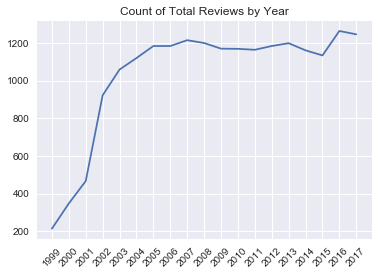

In [32]:
plt.title('Count of Total Reviews by Year')
plt.plot(df.groupby('pub_year').count()['reviewid'])
plt.xticks(range(1999,2018), rotation=45)
plt.show()

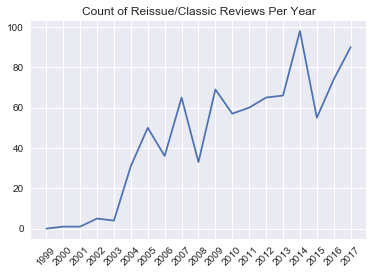

In [33]:
plt.plot(df.groupby('pub_year').sum()['reissue'])
plt.title("Count of Reissue/Classic Reviews Per Year")
plt.xticks(range(1999,2018), rotation=45)
plt.show()

Pitchfork's "Best New Music" designation was introduced in 2003. Since 2009, Pitchfork labels between 80 and 100 albums as Best New Music.

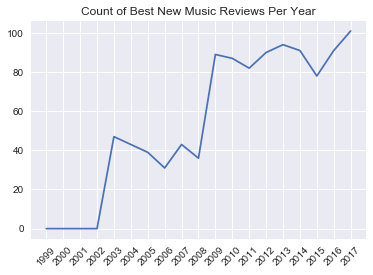

In [34]:
plt.plot(df.groupby('pub_year').sum()['best_new_music'])
plt.title("Count of Best New Music Reviews Per Year")
plt.xticks(range(1999,2018), rotation=45)
plt.show()

Best New Music albums usually receive a score of 8.3 or higher, though this is not a hard-and-fast rule.

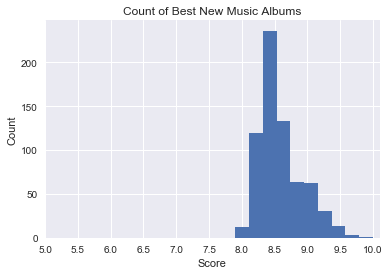

In [35]:
plt.hist(df_new[df_new['best_new_music'] == 1]['score'], bins=10)
plt.title('Count of Best New Music Albums')
plt.xticks(np.arange(5,10.5,.5))
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

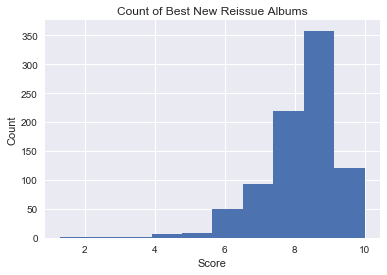

In [36]:
plt.hist(df[df['reissue'] == 1]['score'], bins=10)
plt.title('Count of Best New Reissue Albums')
# plt.xticks(np.arange(5,10.5,.5))
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

On average, roughly 50% of the reviews on Pitchfork are albums by artists being reviewed by Pitchfork for the first time.

In [46]:
df[df['num_prev_reviews'] == 1]['reviewid'].count()/float(df['reviewid'].count())

0.50825688073394493

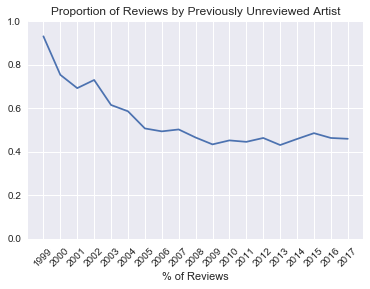

In [40]:
plt.plot(years, (df[df['num_prev_reviews'] == 1].groupby('pub_year')['reviewid'].count()/df.groupby('pub_year')['reviewid'].count()))
plt.title('Proportion of Reviews by Previously Unreviewed Artist')
plt.xticks(years, rotation=45)
plt.xlabel('% of Reviews')
plt.ylim(0,1)
plt.show()

Each year, ~500 album reviews are published by artists not yet covered by Pitchfork. Pitchfork also continues to cover artists later in their careers, giving readers a mix of artists they are familiar with and artists who they should check out.

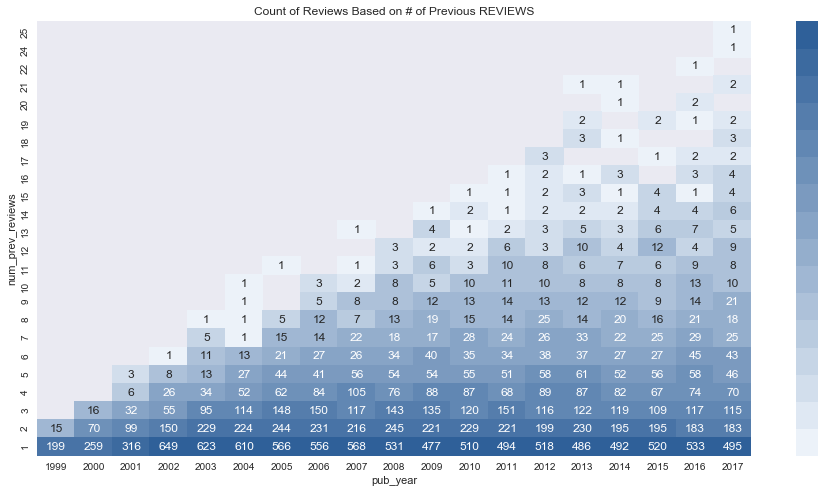

In [47]:
filtered_df = df_new
temp_df = pd.DataFrame(filtered_df.groupby(['pub_year', 'num_prev_reviews'])['reviewid'].count()).reset_index()
heatmap_df = temp_df.pivot(index='num_prev_reviews', columns='pub_year', values='reviewid')

plt.figure(figsize=(16,8))
plt.title("Count of Reviews Based on # of Previous REVIEWS")
plt.xlabel('Year')
plt.ylabel('Score')
sns.heatmap(heatmap_df[::-1], 
            annot=(heatmap_df[::-1]).round(3), 
            norm=LogNorm(vmin=0, vmax=1), 
            fmt='g', 
            cmap=sns.light_palette((250, 80, 40), input='husl', n_colors=16)
           )
plt.show()

In [69]:
df_merged[df_merged['new_album'] == 1].groupby('pub_year').mean()['score']

pub_year
1999    6.849065
2000    6.787931
2001    7.138562
2002    6.775056
2003    6.897734
2004    7.139262
2005    6.982473
2006    6.918118
2007    6.823801
2008    6.824978
2009    6.688605
2010    6.907515
2011    6.959406
2012    6.928025
2013    6.984689
2014    6.962780
2015    7.039352
2016    7.092813
2017    7.158496
Name: score, dtype: float64

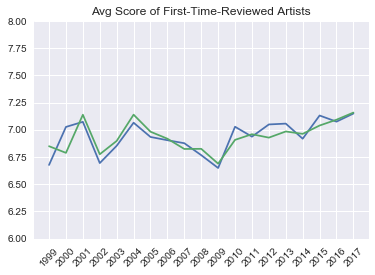

In [68]:
plt.plot(years, df_merged[(df_merged['new_album'] == 1) & (df_merged['order_of_release'] <= 2)].groupby('pub_year').mean()['score'])
plt.plot(years, df_merged[(df_merged['new_album'] == 1)].groupby('pub_year').mean()['score'])
plt.xticks(years, rotation=45)
plt.ylim(6,8)
plt.title('Avg Score of First-Time-Reviewed Artists')
plt.show()

In [51]:
df_merged['binned_release'] = pd.cut(df_merged['order_of_release'], bins=[0,2.1,5.1,10,50] )

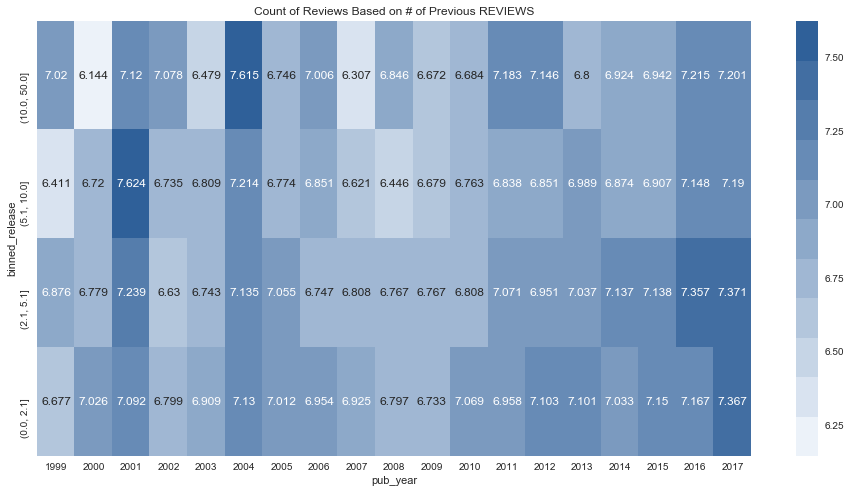

In [52]:
filtered_df = df_merged
temp_df = pd.DataFrame(filtered_df.groupby(['pub_year', 'binned_release'])['score'].mean()).reset_index()
heatmap_df = temp_df.pivot(index='binned_release', columns='pub_year', values='score')

plt.figure(figsize=(16,8))
plt.title("Count of Reviews Based on # of Previous REVIEWS")
plt.xlabel('Year')
plt.ylabel('Score')
plt.ylim(0,20)
sns.heatmap(heatmap_df[::-1], 
            annot=(heatmap_df[::-1]).round(3), 
#             norm=LogNorm(vmin=0, vmax=1), 
            fmt='g', 
            cmap=sns.light_palette((250, 80, 40), input='husl', n_colors=11)
           )
plt.show()

# Distribution of Scores

The overall distribution of scores (for all albums on Pitchfork) is left skewed with a mean of 7.03. There is some expected selection bias, where Pitchfork generally reviews albums that are good enough for its readers to consume. Reviews with very low scores are either released by notable artists, or are written for entertainment value.

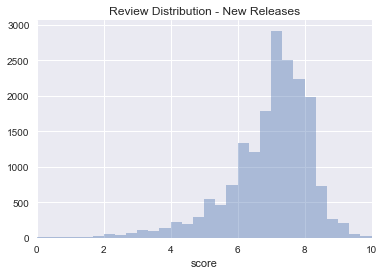

In [72]:
plt.title("Review Distribution - New Releases")
sns.distplot(df_new['score'], bins=30, kde=False)
plt.xlim(0,10)

plt.show()

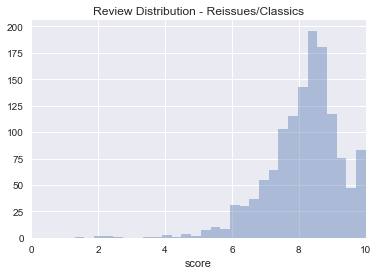

In [73]:
plt.title("Review Distribution - Reissues/Classics")
sns.distplot(df_reissue['score'], bins=30, kde=False)
plt.xlim(0,10)
plt.show()

The yearly mean score hasn't changed much since 1999. Not much to see here.

Classic albums and reissues are subject to hindsight scoring inflation. Not surprisingly, Pitchfork editors give 9+ reviews much more confidently to albums that have withstood the test of time.

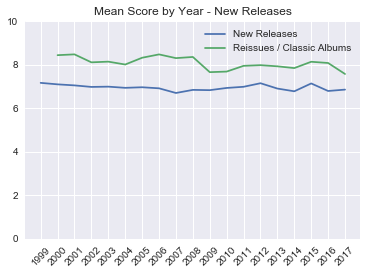

In [82]:
plt.plot(df_new['pub_year'].unique(), df_new.groupby('pub_year')['score'].mean(), label='New Releases')
plt.plot(df_reissue['pub_year'].unique(), df_reissue.groupby('pub_year')['score'].mean(), label='Reissues / Classic Albums')
plt.legend()
plt.title('Mean Score by Year - New Releases')
plt.ylim(0,10)
plt.xticks(range(1999, 2018), rotation=45)
plt.show()

From here on out, we'll mostly just be looking at New Releases.

## What's Happening in the Margins

In [83]:
less3 = list(df_new[df_new['score'] <= 3].groupby('pub_year').count()['reviewid'] / (df_new.groupby('pub_year')['reviewid'].count().astype(float)))
less6 = list(df_new[df_new['score'] <= 6].groupby('pub_year').count()['reviewid'] / (df_new.groupby('pub_year')['reviewid'].count().astype(float)))
more9 = list(df_new[df_new['score'] >= 9].groupby('pub_year').count()['reviewid'] / (df_new.groupby('pub_year')['reviewid'].count().astype(float)))
reis_more9 = list(df_reissue[df_reissue['score'] >= 9].groupby('pub_year').count()['reviewid'] / (df_reissue.groupby('pub_year')['reviewid'].count().astype(float)))

Pitchfork has sharply decreased its frequency of giving scathing reviews. Following are several visuals showing how Pitchfork has gotten more 'vanilla' over the years.

Pitchfork almost never gives out reviews below a 3, when previously it was pretty common. In 'the old days' of Pitchfork, reviews had an edge, where they felt targeting and malicious. Here's a link to a particularly scathing review of Liz Phair's album 'Liz Phair':

https://pitchfork.com/reviews/albums/6255-liz-phair/

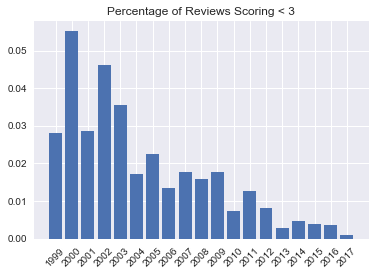

In [84]:
plt.bar(years, less3)
plt.xticks(years, range(1999, 2018),rotation =45)
plt.title("Percentage of Reviews Scoring < 3")
plt.show()

It's becoming more rare to see albums scoring below a 6. Nearly 90% of reviews in 2017 were 6+. Pitchfork has all but abandoned giving negative reviews to albums. Taylor Swift, who previously had never been reviewed before, managed to score a 6.5 in 2017 -- just a few points lower than the critics average on metacritic.

http://www.metacritic.com/music/reputation/taylor-swift/critic-reviews

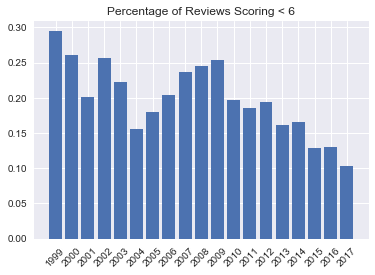

In [85]:
plt.bar(years, less6)
plt.xticks(years, range(1999, 2018),rotation =45)
plt.title("Percentage of Reviews Scoring < 6")

plt.show()

Albums scoring above 9 are still a rare commodity. Since "Best New Music" launched in 2003, 9+ has been sacred space for Pitchfork reviews of new releases.

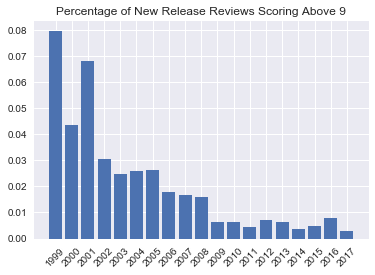

In [86]:
plt.bar(years, more9)
plt.xticks(years, range(1999, 2018),rotation =45)
plt.title("Percentage of New Release Reviews Scoring Above 9")

plt.show()

However, Pitchfork has become more conservative when scoring an artist's first or second majore release. Pitchfork was known for launching the careers of many bands, including Arcade Fire, whose album "Funeral" received a 9.7 in 2004, and Bon Iver, whose album "For Emma, Forever Ago" from 2007 put them on the map. In recent years, there has been a sharp decline in the frequency of new artists receiving scores above 9.0.

## The spread of scores is shrinking

With each major business launch, Pitchfork editors have narrowed the band of score they give throughout the year.

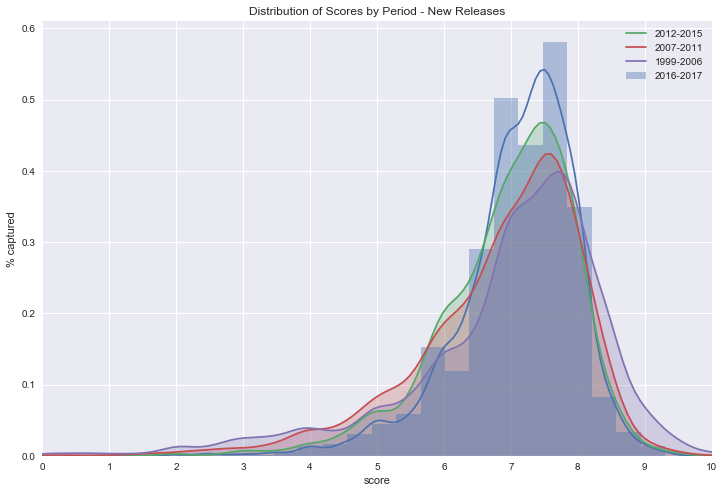

In [87]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title('Distribution of Scores by Period - New Releases')
sns.distplot(df_new[(df_new['pub_year'] > 2014) & (df_new['pub_year'] < 2018)]['score'], label='2016-2017', bins=20)
sns.kdeplot(df_new[(df_new['pub_year'] > 2011) & (df_new['pub_year'] < 2015)]['score'], shade=True, label='2012-2015')
sns.kdeplot(df_new[(df_new['pub_year'] > 2007) & (df_new['pub_year'] < 2012)]['score'], shade=True, label='2007-2011')
sns.kdeplot(df_new[df_new['pub_year'] < 2007]['score'], shade=True, label='1999-2006')
plt.xlabel('score')
plt.xticks(range(0,11))
plt.xlim(0,10)
plt.ylabel('% captured')
plt.legend()
plt.show()

Since 1999, Pitchfork has always scored most of their albums between 6 and 9. But take a look at how the tails have shrunk over time.

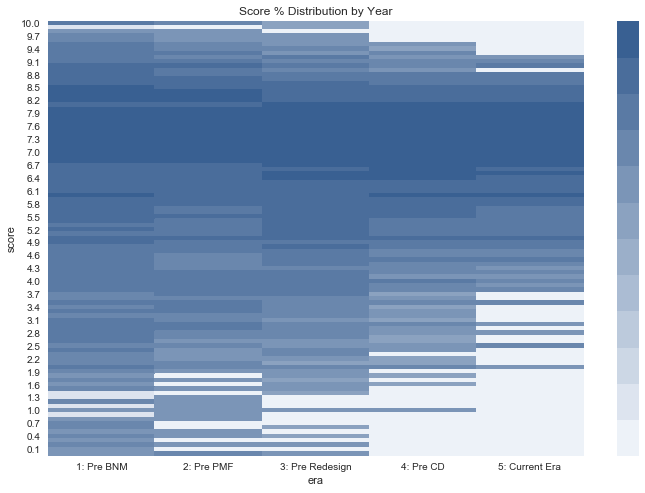

In [94]:
temp_df = pd.DataFrame(df_new.groupby(['era', 'score'])['reviewid'].count()).reset_index()
heatmap_df = temp_df.pivot(index='score', columns='era', values='reviewid').fillna(.001)
df_norm_col=(heatmap_df)/heatmap_df.sum()

plt.figure(figsize=(12,8))
plt.title("Score % Distribution by Year")
plt.xlabel('Year')

plt.ylabel('Score')
sns.heatmap(df_norm_col[::-1], 
#             annot=(df_norm_col[::-1]).round(3), 
            norm=LogNorm(vmin=0, vmax=1), 
            fmt='.1%', 
            cmap=sns.light_palette((250, 70, 40), input='husl', n_colors=12)
           )
plt.show()

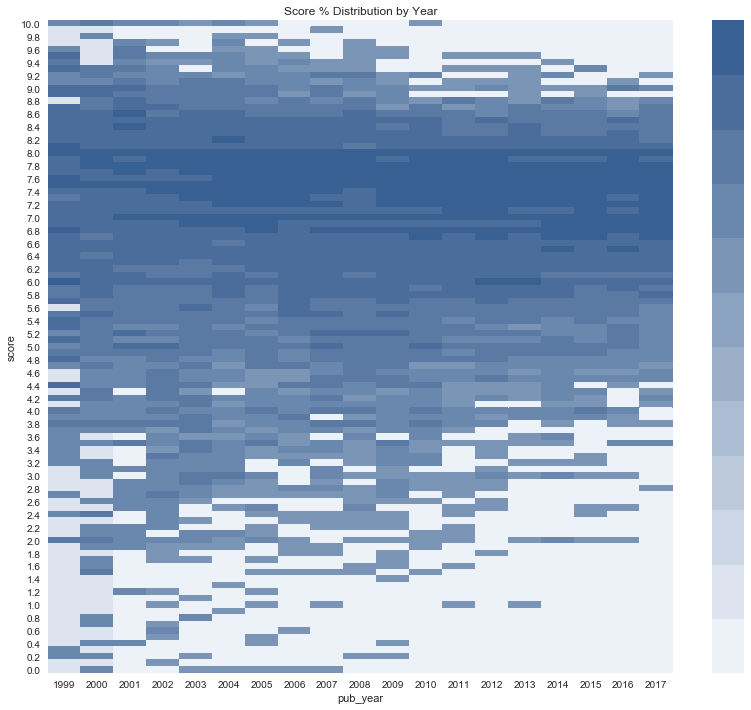

In [95]:
temp_df = pd.DataFrame(df_new.groupby(['pub_year', 'score'])['reviewid'].count()).reset_index()
heatmap_df = temp_df.pivot(index='score', columns='pub_year', values='reviewid').fillna(.001)
df_norm_col=(heatmap_df)/heatmap_df.sum()

plt.figure(figsize=(14,12))
plt.title("Score % Distribution by Year")
plt.xlabel('Year')

plt.ylabel('Score')
sns.heatmap(df_norm_col[::-1], 
#             annot=(df_norm_col[::-1]).round(3), 
            norm=LogNorm(vmin=0, vmax=1), 
            fmt='.1%', 
            cmap=sns.light_palette((250, 70, 40), input='husl', n_colors=12)
           )
plt.show()

Here's another way to look at it:

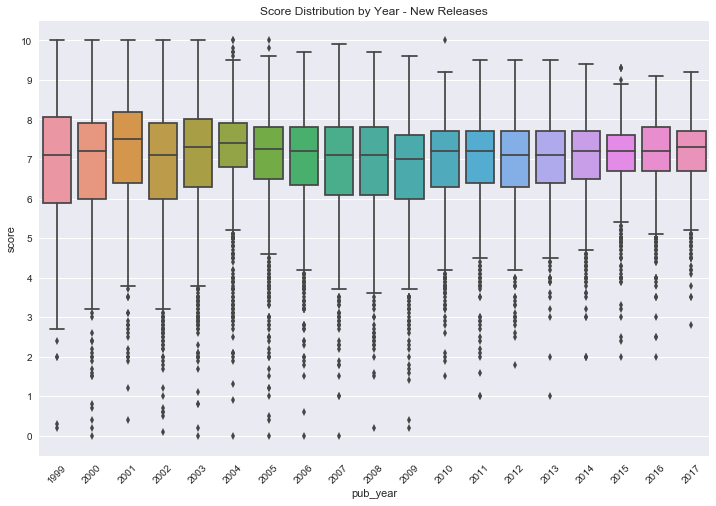

In [100]:
plt.figure(figsize=(12,8))

sns.boxplot(x=df_new['pub_year'], y=df_new['score'], data=df_new[['score', 'pub_year']])
plt.title('Score Distribution by Year - New Releases')
plt.yticks(np.arange(0,11))

plt.xticks(rotation=45)
plt.show()

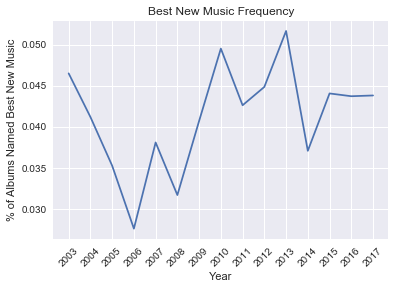

In [102]:
score_by_year = df_new.groupby('pub_year').agg(['mean', 'max','min','count','sum']).reset_index()

score_by_year['percent_bnm'] = score_by_year['best_new_music']['sum'] / score_by_year['score']['count']

plt.plot(score_by_year['pub_year'][4:19], score_by_year['percent_bnm'][4:19])
plt.title('Best New Music Frequency')
plt.xticks(score_by_year['pub_year'][4:19], rotation=45)
plt.yticks()
plt.xlabel('Year')
plt.ylabel('% of Albums Named Best New Music')
plt.show()

# Basic NLP

I'm using TextBlob to measure the polarity and subjectivity of each review. Polarity is a score between [-1, 1] measuring positivity of text, and subjectivity is a score between [0, 1] where scores closer to 1 are more subjective. I ran the sentiment analysis of both the 1-2 sentence abstract preceding each review, as well as the entire review content.

In [ ]:
# box plot of avg word count

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(x=df['pub_year'], y=df['word_count'], data=df[['word_count', 'pub_year']])
plt.title('Word Count Distribution by Year - New Releases')
# plt.yticks(np.arange(0,11))

plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.plot(df['pub_year'].unique()[::-1], df.groupby('pub_year')['word_count'].mean())

plt.xticks(years, rotation=45)
plt.xlim(1999, 2018)
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.title('Avg Word Count by Year - All')
plt.show()

In [ ]:
plt.plot(df_new['pub_year'].unique()[::-1], df_new.groupby('pub_year')['avg_word_length'].mean())

plt.xticks(years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.title('Avg Word Length - New Releases')
plt.show()

In [ ]:
plt.plot(df_new['pub_year'].unique()[::-1], df_new.groupby('pub_year')['adj_word_length'].mean())

plt.xticks(years, rotation=45)
plt.xlabel('Year')
plt.ylim(5, 7)
plt.ylabel('Word Count')
plt.title('Avg Word Length of Adjectives - New Releases')
plt.show()

In [ ]:
plt.plot(df_new['pub_year'].unique()[::-1], df_new.groupby('pub_year')['adj_freq'].mean())

plt.xticks(years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Adjective/Adverb Frequency')
plt.title('Adjective/Adverb Frequency by Year')
plt.show()

In [ ]:
plt.plot(df_new['pub_year'].unique()[::-1], df_new.groupby('pub_year')['adj_freq'].mean())

plt.xticks(years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Adjective/Adverb Frequency')
plt.title('Adjective/Adverb Frequency by Year')
plt.show()

Average subjectivity of reviews has gone down year over year. Authors are becoming more objective, using language that is less opinion-based in the content. Yet, interestingly, the abstracts have gotten considerably *more* subjective in recent years. This makes sense -- readers can get a quick glance at Pitchfork's opinion, and then read more if they want to learn more about the album.

In [ ]:
# report on shortcomings of TextBlob dictionary

In [22]:
temp_df.groupby('pub_year')['cont_subjectivity'].mean()

pub_year
2003    0.516572
2004    0.492006
2005    0.511193
2006    0.507357
2007    0.501060
2008    0.484463
2009    0.487260
2010    0.496988
2011    0.499457
2012    0.502749
2013    0.494546
2014    0.488275
2015    0.492938
2016    0.491727
2017    0.482991
Name: cont_subjectivity, dtype: float64

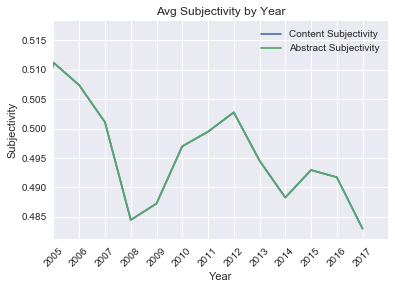

In [20]:
temp_df = df[df['best_new_music'] == 1]
plt.plot(temp_df['pub_year'].unique()[::-1], temp_df.groupby('pub_year')['cont_subjectivity'].mean(), label='Content Subjectivity')
plt.plot(temp_df['pub_year'].unique()[::-1], temp_df.groupby('pub_year')['abs_subjectivity'].mean(), label='Abstract Subjectivity')

plt.xticks(years, rotation=45)
plt.xlim(2005, 2018)
plt.xlabel('Year')
plt.ylabel('Subjectivity')
plt.title('Avg Subjectivity by Year')
plt.legend()
plt.show()

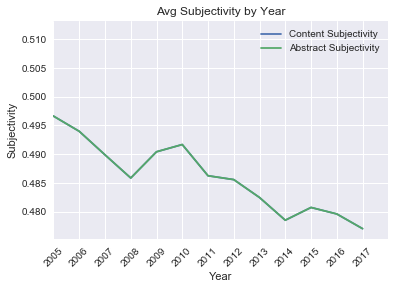

In [23]:
plt.plot(df['pub_year'].unique()[::-1], df.groupby('pub_year')['cont_subjectivity'].mean(), label='Content Subjectivity')
plt.plot(df['pub_year'].unique()[::-1], df.groupby('pub_year')['abs_subjectivity'].mean(), label='Abstract Subjectivity')

plt.xticks(years, rotation=45)
plt.xlim(2005, 2018)
plt.xlabel('Year')
plt.ylabel('Subjectivity')
plt.title('Avg Subjectivity by Year')
plt.legend()
plt.show()

Since negative and positive sentiments will average each other out, I'm filtering to look at Best New Music albums only when analysing polarity. In 2010 and 2014, editors were particularly enthusiastic in the abstract.

In [ ]:
df_bnm = df_new[df_new['best_new_music'] == 1]

plt.plot(df_bnm['pub_year'].unique()[::-1], df_bnm.groupby('pub_year')['cont_polarity'].mean(), label='Content Polarity')
plt.plot(df_bnm['pub_year'].unique()[::-1], df_bnm.groupby('pub_year')['abs_polarity'].mean(), label='Abstract Polarity')

plt.xticks(years, rotation=45)
plt.xlim(2005, 2018)
plt.xlabel('Year')
plt.ylabel('Subjectivity')
plt.title('BNM Avg Polarity by Year')
plt.legend()
plt.show()

## Simple Linear Regression Using Subjectivity/Polarity

In [ ]:
df_new[df_new['cont_polarity'] == -1]['non_PN_words']

In [ ]:
plt.scatter(df_new['word_count'], df_new['score'])

In [ ]:
plt.scatter(df_new['avg_word_length'], df_new['score'])

In [ ]:
plt.scatter(df_new['adj_freq'], df_new['score'])

In [ ]:
plt.scatter(df_new['abs_subjectivity'], df_new['score'], alpha=.3)
plt.title('Subjectivity Vs. Score')
plt.ylabel("Score")
plt.xlim(.25, .7)
plt.xlabel("Subjectivity")
plt.show()

In [ ]:
df.head()

In [ ]:
plt.scatter(df_new[df_new['pub_year'] > 2004]['abs_polarity'], df_new[df_new['pub_year'] > 2004]['score'], alpha=.3)
plt.title('Polarity Vs. Score')
plt.ylabel("Score")
plt.xlabel("Polarity")
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
Y = df['score']
X = df[['avg_score_of_prev_reviews',
#         'cont_polarity', 
#         'avg_word_length',
        
#         'new_album',
#         'genre_electronic', 
#         'genre_experimental',
#         'genre_global', 
#         'genre_jazz',
#         'genre_pop/r&b', 
#         'genre_rap', 
#         'genre_rock', 
#         'cont_subjectivity',
#         'adj_freq', 
       ]]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
Y = df['score']
X = df[['abs_polarity']]
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

In [ ]:
def plot_subj_violins_score(df, genre='all genres'):
    scores = list(df.score_bin.unique())
    pol_dist = {1: [],}
    for pol,score in zip(df.subjectivity.astype(list), df.score_bin.astype(list)):
        if score not in pol_dist.keys():
            pol_dist[score] = []
        else:
            pol_dist[score] = pol_dist[score] + [pol]

    plt.figure(figsize=(30,14))
#     plt.hlines(df['subjectivity'].mean(), 0, 10, linestyles='dotted')
    for each in scores:
        plt.xticks(range(0,11), fontsize=16)
        plt.violinplot(np.array(pol_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Subjectivity Distribution by Score ({})'.format(genre), fontsize=24)
    plt.ylabel('Subjectivity', fontsize=16)
    plt.xlabel('Binned Score', fontsize=16)

In [ ]:
sns.boxplot(x=df[df['best_new_music'] == 1]['pub_year'], y=df[df['best_new_music'] == 1]['cont_subjectivity'], data=df[df['best_new_music'] == 1][['score', 'cont_subjectivity']])
# plt.ylim(.28, .7)
plt.title("Subjectivity Distribution by Year -- Best New Music Albums")
plt.xticks(rotation=45)
# plt.yticks(np.arange(.3,.7,.025))

plt.show()

In [ ]:
sns.boxplot(x=df['pub_year'], y=df['cont_subjectivity'], data=df[['score', 'cont_subjectivity']])
# plt.ylim(.28, .7)
plt.title("Subjectivity Distribution by Year -- All Albums")
# plt.yticks(np.arange(.3,.7,.025))

plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.boxplot(x=df_new['pub_year'], y=df_new['cont_subjectivity'], data=df_new[['score', 'cont_subjectivity']])
plt.title("Subjectivity Distribution by Year -- New Releases")
# plt.ylim(.28, .7)
plt.xticks(rotation=45)
# plt.yticks(np.arange(.3,.7,.025))

plt.show()

In [ ]:
sns.boxplot(x=df_reissue['pub_year'], y=df_reissue['cont_subjectivity'], data=df_reissue[['score', 'cont_subjectivity']])
plt.title("Subjectivity Distribution by Year -- Reissues and Classic Albums")
plt.xticks(rotation=45)
# plt.yticks(np.arange(.3,.7,.025))

plt.show()

In [ ]:
pd.DataFrame(df['artist'].unique()).to_csv('artists.csv')

In [ ]:
pd.to_csv(len(list(df['artist'].unique())))

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('artists.csv')

In [ ]:
df['artist'] = df['0']

In [ ]:
list(df['artist'].unique()).index('the coup'
                                 )

In [ ]:
df_spotify[df_spotify['artist'] == 'wilco']

In [ ]:
df_merged.drop('abstract', axis=1, inplace=True)

In [ ]:
df_not_on_spotify = df_merged[pd.isnull(df_merged).any(axis=1)]

In [ ]:
df_merged[df_merged['artist'] == 'wilco']

In [ ]:
df_merged = df.merge(df_spotify, on=['artist', 'title'])

In [ ]:
df_merged.columns

In [ ]:
df_new_artist_bnm = df_merged[(df_merged['best_new_music'] == 1) & (df_merged['order_of_release'] < 3) & (df_merged['new_album'] == 1)][['title', 'artist', 'score', 'pub_year', 'order_of_release']]

In [ ]:
df_merged.shape

In [ ]:
plt.figure(figsize=(10,8))
x = range(2003,2018)
y = df_new_artist_bnm.groupby('pub_year')['title'] \
         .count()/df_merged[(df_merged['best_new_music'] == 1) & \
         (df_merged['new_album'] == 1)].groupby('pub_year')['reviewid'].count()
plt.plot(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("Percent of Best New Music Albums Where The Album is \n the Artist's First or Second Release")
plt.xticks(years[4:19], rotation=45)
plt.xlabel('Year')
plt.ylabel('Percent')
plt.ylim(0, 1)
plt.show()

In [ ]:
filtered_df = df_not_on_spotify[(df_not_on_spotify['score'] >= 8) & (df_not_on_spotify['new_album'] == 1) & (df_not_on_spotify['num_prev_reviews'] < 3)]


In [ ]:
df_not_on_spotify[df_not_on_spotify['num_prev_reviews'] < 3].head()

In [ ]:
# x: year
# y: score 8.0 - 10.0
# z: count of first/second releases with that score

filtered_df = df[(df['score'] >= 8) & (df['new_album'] == 1) & (df['num_prev_reviews'] == 1)]
temp_df = pd.DataFrame(filtered_df.groupby(['pub_year', 'score'])['reviewid'].count()).reset_index()
heatmap_df = temp_df.pivot(index='score', columns='pub_year', values='reviewid')

plt.figure(figsize=(16,8))
plt.title("First Time Pitchfork has Reviewed Artist")
plt.suptitle('Count of Albums Receiving Scores +8.0')
plt.xlabel('Year')
plt.ylabel('Score')
sns.heatmap(heatmap_df[::-1], 
            annot=(heatmap_df[::-1]).round(3), 
            norm=LogNorm(vmin=0, vmax=1), 
            fmt='g', 
            cmap=sns.light_palette((250, 80, 40), input='husl', n_colors=16)
           )
plt.show()

In [ ]:
# x: year
# y: score 8.0 - 10.0
# z: count of first/second releases with that score

filtered_df = df_merged[(df_merged['score'] >= 8) & (df_merged['new_album'] == 1) & (df_merged['order_of_release'] < 3)]
temp_df = pd.DataFrame(filtered_df.groupby(['pub_year', 'score'])['best_new_music'].count()).reset_index()
heatmap_df = temp_df.pivot(index='score', columns='pub_year', values='best_new_music')

plt.figure(figsize=(16,8))
plt.title("First or Second Major Release by Artist")
plt.suptitle('Count of Albums Receiving Scores +8.0')
plt.xlabel('Year')
plt.ylabel('Score')
sns.heatmap(heatmap_df[::-1], 
            annot=(heatmap_df[::-1]).round(3), 
#             norm=LogNorm(vmin=0, vmax=1), 
            fmt='g', 
            cmap=sns.light_palette((250, 80, 40), input='husl', n_colors=16)
           )
plt.show()

In [ ]:
df_merged

In [ ]:
df_new_artist_bnm.groupby('pub_year')['title'].count()

In [ ]:
df_merged[['artist', 'title', 'score', 'num_prev_reviews', 'order_of_release']]